In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv('Bank.csv')
df.head(100)

Saving Bank.csv to Bank.csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,management,divorced,tertiary,no,122,yes,no,unknown,19,may,1622,2,-1,0,unknown,yes
96,30,technician,single,tertiary,no,880,yes,yes,unknown,19,may,967,6,-1,0,unknown,yes
97,41,technician,married,secondary,no,501,yes,no,unknown,19,may,579,5,-1,0,unknown,yes
98,36,blue-collar,married,secondary,no,4438,yes,no,unknown,20,may,446,1,-1,0,unknown,yes


# Check Missing / Null Value

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df['age'].describe()
df['age'].value_counts().head(10)


,count
age,
31,496
32,477
34,466
33,464
35,461
30,456
36,432
37,370
38,353


In [ ]:
df['job'].value_counts()
df['job'].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [ ]:
df['marital'].value_counts()
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

## Data exploration and visualization

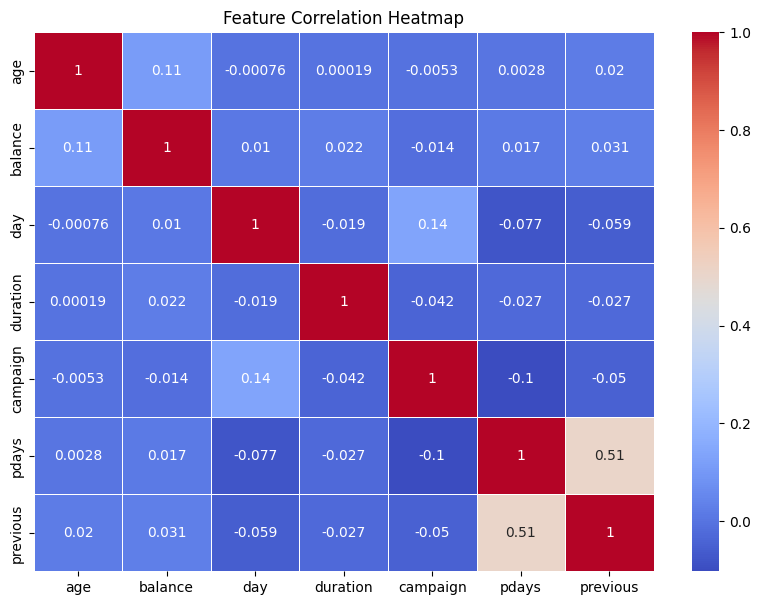

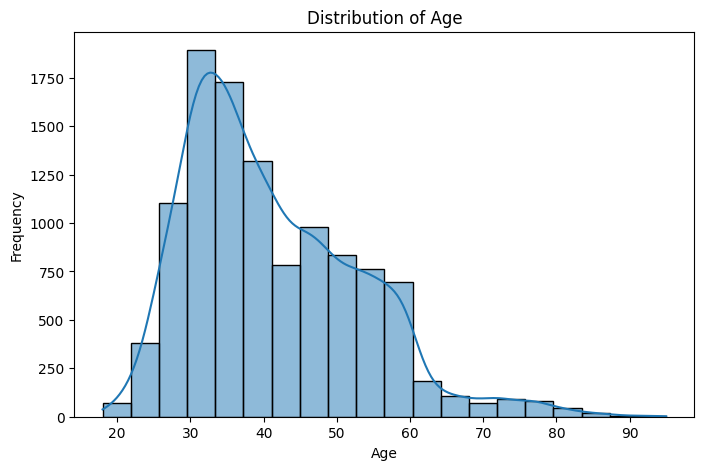

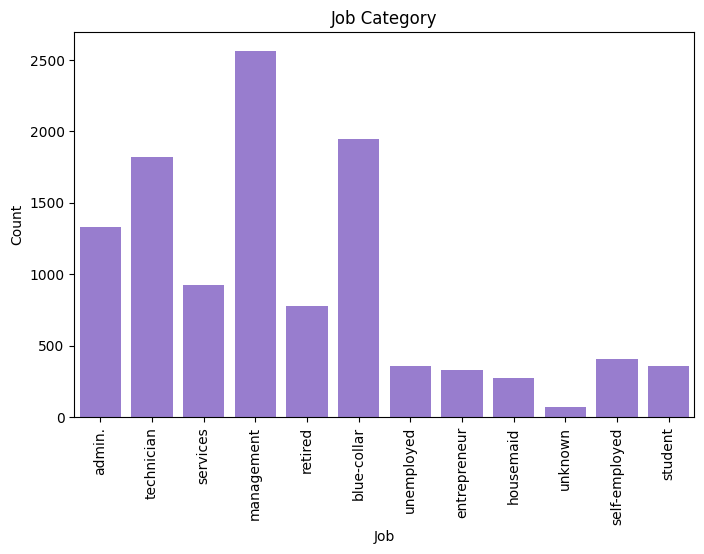

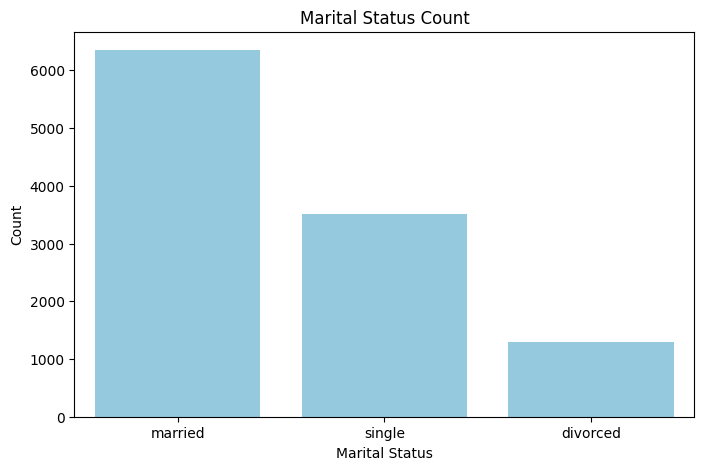

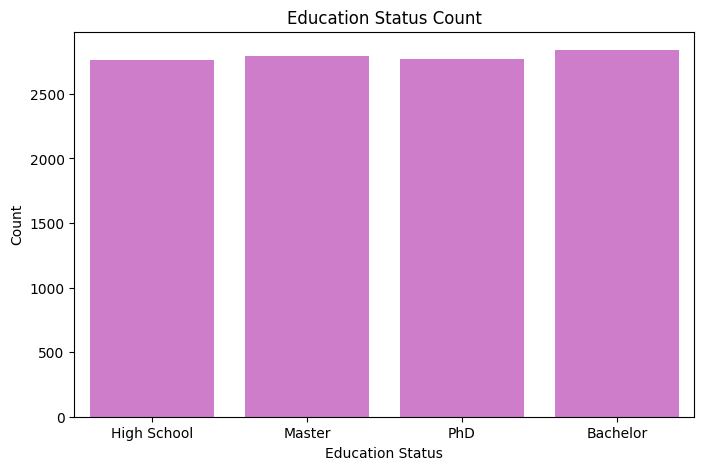

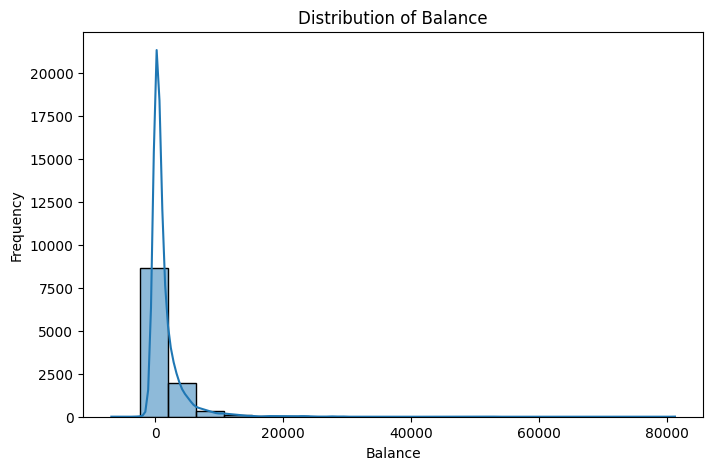

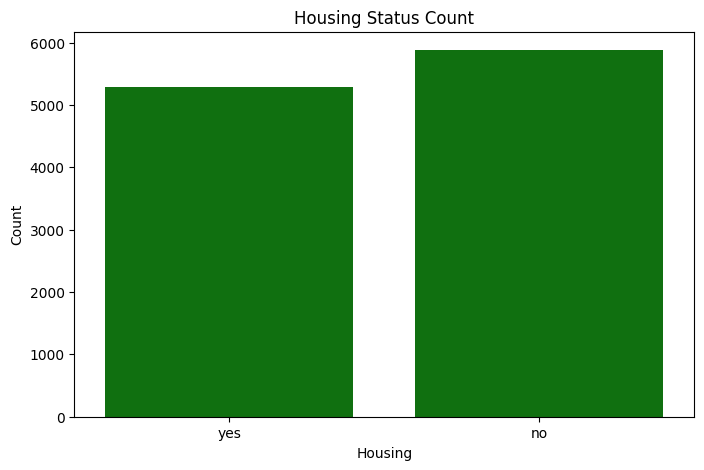

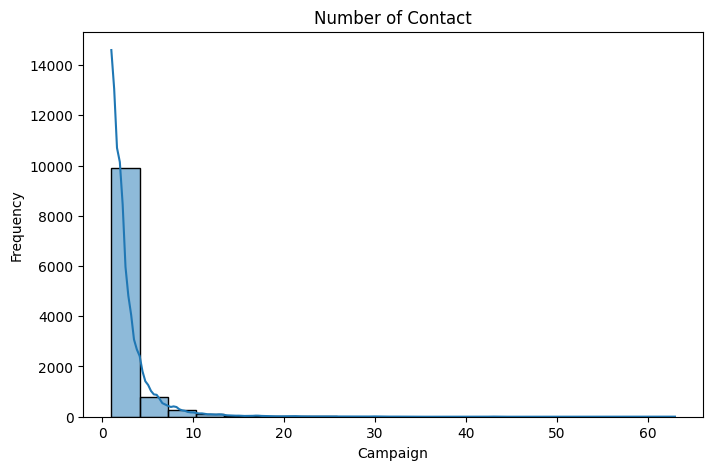

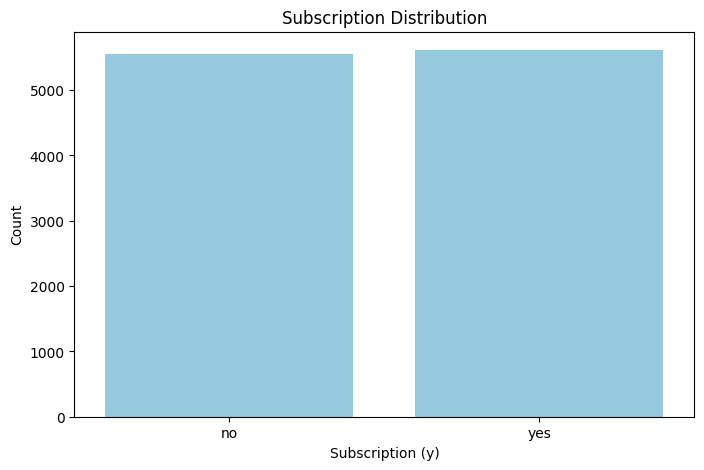

/tmp/ipython-input-1667698805.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=df, palette='pastel')


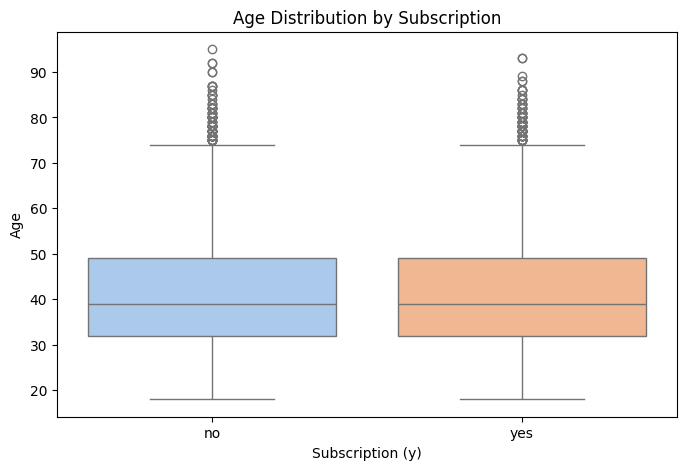

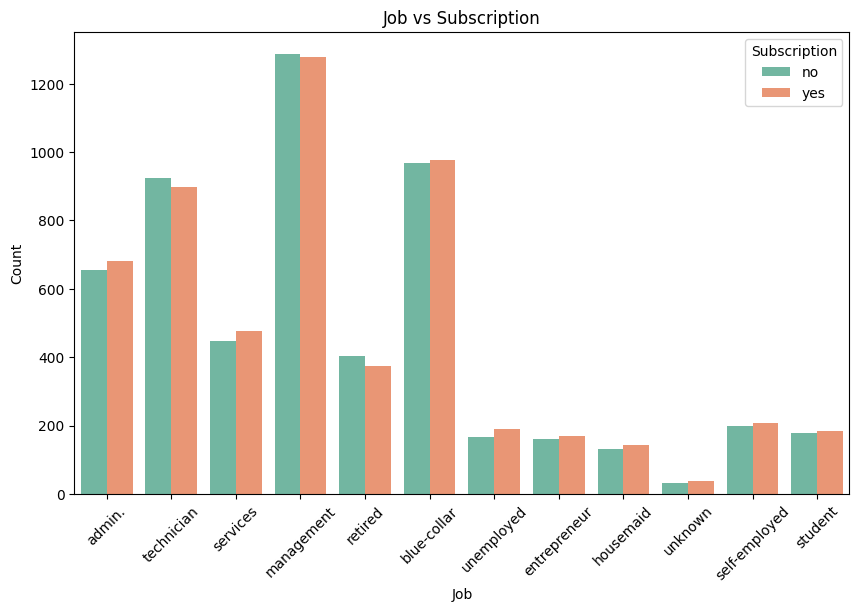

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Heatmap
plt.figure(figsize=(10,7))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x=df['job'], color='mediumpurple')
plt.xticks(rotation=90)
plt.title("Job Category")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(
    x=df['marital'].value_counts().index,
    y=df['marital'].value_counts().values,
    color='skyblue'
)
plt.title("Marital Status Count")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


#---------Education Level#----------

education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
df['Education'] = np.random.choice(education_levels, size=len(df))

# Now make the barplot
plt.figure(figsize=(8,5))
sns.countplot(x='Education', data=df, color='orchid')
plt.title("Education Status Count")
plt.xlabel("Education Status")
plt.ylabel("Count")
plt.show()

#-----------Distribution of Balance#----------

plt.figure(figsize=(8,5))
sns.histplot(df['balance'], bins=20, kde=True)
plt.title("Distribution of Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

#----------Housing Status Count-----------#

plt.figure(figsize=(8,5))
sns.countplot(x='housing', data=df, color='green')  # Color added
plt.title("Housing Status Count")
plt.xlabel("Housing")
plt.ylabel("Count")
plt.show()

#----------Number of Contact-----------#

plt.figure(figsize=(8,5))
sns.histplot(df['campaign'], bins=20, kde=True)
plt.title("Number of Contact")
plt.xlabel("Campaign")
plt.ylabel("Frequency")
plt.show()

#--
df['y'] = np.random.choice(['yes', 'no'], size=len(df))

#------Subscription Distribution--------#
plt.figure(figsize=(8,5))
sns.countplot(x='y', data=df, color='skyblue')
plt.title("Subscription Distribution")
plt.xlabel("Subscription (y)")
plt.ylabel("Count")
plt.show()

#---------Age vs Subscription---------#

plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='age', data=df, palette='pastel')
plt.title("Age Distribution by Subscription")
plt.xlabel("Subscription (y)")
plt.ylabel("Age")
plt.show()

#-----------Job vs Subscription---------#

plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='y', data=df, palette='Set2')
plt.title("Job vs Subscription")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()















In [3]:
df.shape


(11162, 17)

# Apply Classifiers

In [7]:

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Target column
target_col = 'deposit'

# Features and Target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Model
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.782024484920872

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      1742
           1       0.78      0.76      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [6]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

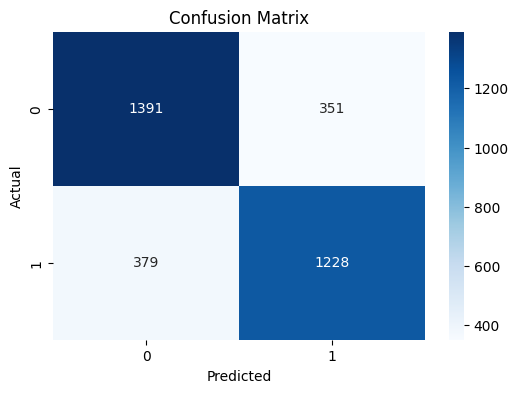

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Analyze customer groups

In [10]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,40,50,60,100],
                         labels=['18-30','31-40','41-50','51-60','60+'])

age_analysis = df.groupby('age_group')['deposit'].mean()*100
print(age_analysis)


age_group
18-30    56.928464
31-40    43.266476
41-50    40.825321
51-60    43.602151
60+      82.160393
Name: deposit, dtype: float64


/tmp/ipython-input-2293712407.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('age_group')['deposit'].mean()*100


In [20]:
# Job vs Deposit
job_analysis = df.groupby('job')['deposit'].mean()*100
print(job_analysis.sort_values(ascending=False))

# Education vs Deposit
edu_analysis = df.groupby('education')['deposit'].mean()*100
print(edu_analysis.sort_values(ascending=False))

# Housing vs Deposit
housing_analysis = df.groupby('housing')['deposit'].mean()*100
print(housing_analysis.sort_values(ascending=False))

# Campaign vs Deposit
campaign_analysis = df.groupby('campaign')['deposit'].mean()*100
print(campaign_analysis.sort_values(ascending=False))




job
8     74.722222
5     66.323907
10    56.582633
4     50.701481
11    48.571429
0     47.301349
6     46.172840
9     46.077894
7     39.978332
3     39.781022
2     37.500000
1     36.419753
Name: deposit, dtype: float64
education
2    54.106804
3    50.704225
1    44.740687
0    39.400000
Name: deposit, dtype: float64
housing
0    57.031117
1    36.640788
Name: deposit, dtype: float64
campaign
1     53.376407
29    50.000000
32    50.000000
3     46.782740
2     46.268164
17    42.857143
4     41.115435
11    40.000000
5     36.772487
6     34.716981
7     33.812950
15    30.769231
9     29.166667
10    26.923077
14    26.666667
8     25.000000
16    22.222222
24    20.000000
20    20.000000
13    20.000000
12    13.793103
21    12.500000
19     0.000000
18     0.000000
25     0.000000
26     0.000000
22     0.000000
23     0.000000
28     0.000000
27     0.000000
30     0.000000
31     0.000000
33     0.000000
41     0.000000
43     0.000000
63     0.000000
Name: deposit, dtype:

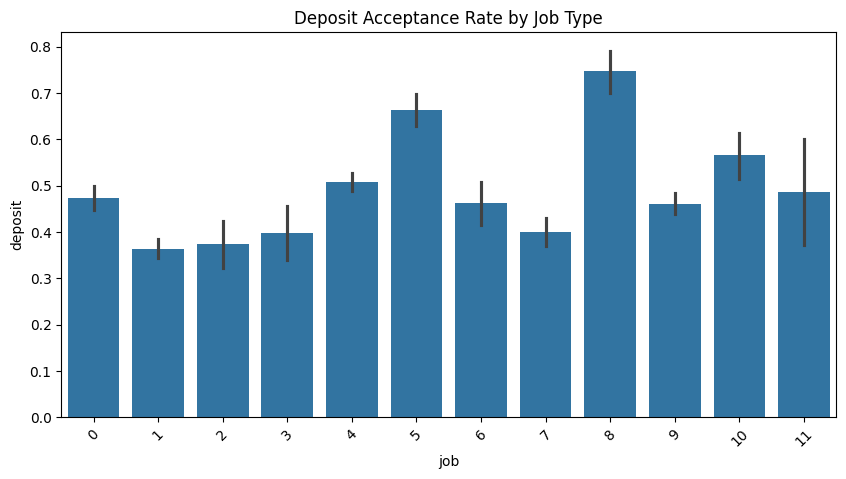

In [21]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x='job', y='deposit', data=df)
plt.xticks(rotation=45)
plt.title("Deposit Acceptance Rate by Job Type")
plt.show()


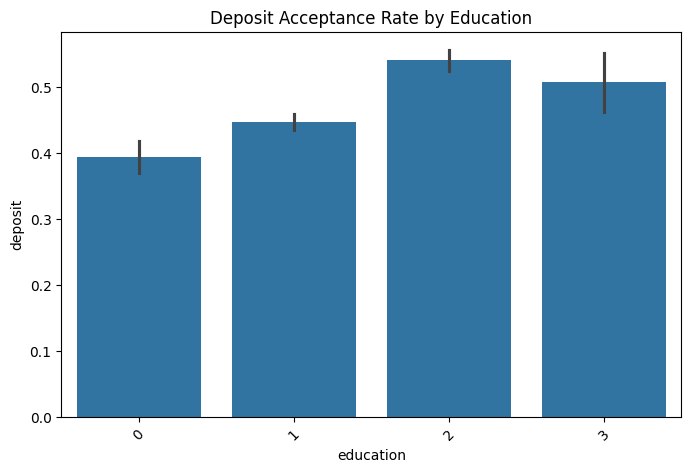

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='education', y='deposit', data=df)
plt.xticks(rotation=45)
plt.title("Deposit Acceptance Rate by Education")
plt.show()
